# **Final Assignment**
In this assignment, you will implement K-Nearest Neighbour (KNN) and Ordinary Least Square (OLS) regression methods. Download the [excel file](https://docs.google.com/spreadsheets/d/17f6h4h-4x6XMuI4Budcw4Ujoxd0ceogv). The dataset contains 11 columns: `"bedrooms"`, `"bathrooms"`, `"sqft_living"`, `"sqft_lot"`, `"floors"`, `"condition"`, `"grade"`, `"sqft_above"`, `"sqft_basement"`, `"age"`and `"price"`.
Use `pd.read_excel()` to read the file and make prediction of whether a given house is likely to be expensive based on the features related to the house.

Use KNN and OLS regression independently to determine and compare their performance in terms of accuracy and confusion matrix.

To accomplish this task, you will have to convert the values under `"price"` into one of two possible values: **1** and **0** denoting "expensive" and "cheap" respectively. For this, if the price of the house is less than `450000`, it is "cheap"; otherwise it is "expensive" . 

**Note:**This conversion must be done before training for KNN, and after conversa for OLS regression, on each predicted `"price"`.

In [23]:
from matplotlib import pyplot as plt
import os
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
data= pd.read_excel("house_data.xlsx")
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,age,price
0,3,1.00,1180,5650,1.0,3,7,1180,0,68,221900
1,3,2.25,2570,7242,2.0,3,7,2170,400,72,538000
2,2,1.00,770,10000,1.0,3,6,770,0,90,180000
3,4,3.00,1960,5000,1.0,5,7,1050,910,58,604000
4,3,2.00,1680,8080,1.0,3,8,1680,0,36,510000


In [4]:
data['price'] = data['price'].apply(lambda x: 1 if x >= 450000 else 0)

In [5]:
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'age']]
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,age
0,3,1.00,1180,5650,1.0,3,7,1180,0,68
1,3,2.25,2570,7242,2.0,3,7,2170,400,72
2,2,1.00,770,10000,1.0,3,6,770,0,90
3,4,3.00,1960,5000,1.0,5,7,1050,910,58
4,3,2.00,1680,8080,1.0,3,8,1680,0,36


In [6]:
y = data[['price']]
y.head()

,price
0,0
1,1
2,0
3,1
4,1


In [7]:
X = X.values
y = y.values
print(X.shape, y.shape)

(21613, 10) (21613, 1)


In [8]:
X = np.c_[np.ones((X.shape[0], 1)), X]

In [9]:
X_train = X[:300]
y_train = y[:300]

X_test = X[300:]
y_test = y[300:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(300, 11) (300, 1) (21313, 11) (21313, 1)


In [10]:
R = np.matmul(X_train.T, X_train)
R_inv = np.linalg.inv(R)
Q_transpose = X_train.T

beta = np.matmul(R_inv, Q_transpose).dot(y_train)

print(beta)

[[-6.32236297e+00]
 [-3.19286309e-01]
 [ 5.15602182e-01]
 [-2.04182916e-04]
 [ 1.27468802e-06]
 [ 1.16707538e+00]
 [ 2.93329413e-02]
 [ 8.67025769e-02]
 [ 9.18387053e-04]
 [ 1.32027500e-03]
 [ 5.92513916e-03]]


In [11]:
y_hat = X_test.dot(beta)

print(list(zip(y_hat, y_test)))

[(array([1.28210237]), array([1])), (array([-0.97493125]), array([0])), (array([-1.8686463]), array([1])), (array([-1.31288587]), array([0])), (array([-1.86276699]), array([0])), (array([-1.98683417]), array([1])), (array([-2.40371492]), array([1])), (array([-1.52628625]), array([1])), (array([-2.64806249]), array([1])), (array([0.19283067]), array([1])), (array([-1.30221728]), array([1])), (array([-2.73222371]), array([0])), (array([0.05332602]), array([1])), (array([0.16143906]), array([1])), (array([0.16143906]), array([1])), (array([-2.58635642]), array([0])), (array([-1.57992825]), array([1])), (array([-2.34466248]), array([0])), (array([-2.74464647]), array([1])), (array([-4.25205653]), array([0])), (array([-0.98034681]), array([1])), (array([-1.30278202]), array([1])), (array([-3.21864491]), array([0])), (array([-3.10445707]), array([0])), (array([-3.05804941]), array([0])), (array([-3.05804941]), array([0])), (array([-0.35403406]), array([0])), (array([-1.85186965]), array([1])

In [12]:
e = y_test - y_hat
print(e*100)

[[-28.21023744]
 [ 97.49312491]
 [286.86462976]
 ...
 [273.20053302]
 [161.70980227]
 [272.64294555]]


In [13]:
sse = e.T.dot(e)
sst = (y_test - np.average(y_test)).T.dot(y_test - np.average(y_test))
r_squared = 1 - sse/sst
print(r_squared)

[[-26.75691675]]


In [14]:
def pred(a):
  t = [1]+a
  return np.array(t).dot(beta)

In [32]:
#['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'age']
res =[]
res = pred([3, 3, 1100, 5000, 1, 3, 7, 1100, 0, 50])*100
#res = pred([4, 3, 2950, 5000, 2, 3, 9, 1980, 970, 70])*100

if res[0] >0:
  print("Expensive")
else:
  print("Cheap")

print(res)


Cheap
[-278.31681619]


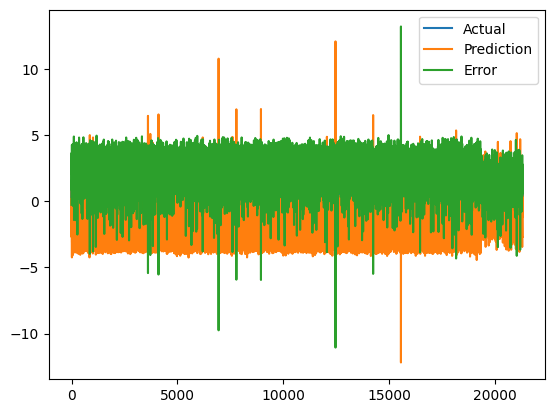

In [18]:
plt.plot(y_test)
plt.plot(y_hat)
plt.plot(e)
plt.legend(["Actual", "Prediction", "Error"])
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
k = 3 # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
print("KNN accuracy:", knn_acc)
print("KNN confusion matrix:", knn_cm)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN accuracy: 0.7201017811704835
KNN confusion matrix: [[1546  558]
 [ 652 1567]]


In [34]:
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_pred = ols.predict(X_test)
ols_pred = [1 if x >= 0.5 else 0 for x in ols_pred] 
ols_acc = accuracy_score(y_test, ols_pred)
ols_cm = confusion_matrix(y_test, ols_pred)
print("OLS accuracy:", ols_acc)
print("OLS confusion matrix:", ols_cm)

OLS accuracy: 0.7883414295628036
OLS confusion matrix: [[1797  307]
 [ 608 1611]]
